# <b>Comcast Telecom Consumer Complaints Analysis </b>

## Introduction

<p>Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve.</p>

<p>In 2004 and 2007, the American Customer Satisfaction Index (ACSI) survey found that Comcast had the worst customer satisfaction rating of any company or government agency in the country, including the Internal Revenue Service. The ACSI indicates that almost half of all cable customers (regardless of company) have registered complaints, and that cable is the only industry to score below 60 in the ACSI. Comcast's Customer Service Rating by the ACSI surveys indicate that the company's customer service has not improved since the surveys began in 2001. Analysis of the surveys states that "Comcast is one of the lowest scoring companies in ACSI. As its customer satisfaction eroded by 7% , over the past year, revenue increased by 12%. The ACSI analysis also addresses this contradiction, stating that "Such pricing power usually comes with some level of monopoly protection and most cable companies have little competition at the local level. This also means that a cable company can do well financially even though its customers are not particularly satisfied."</p>

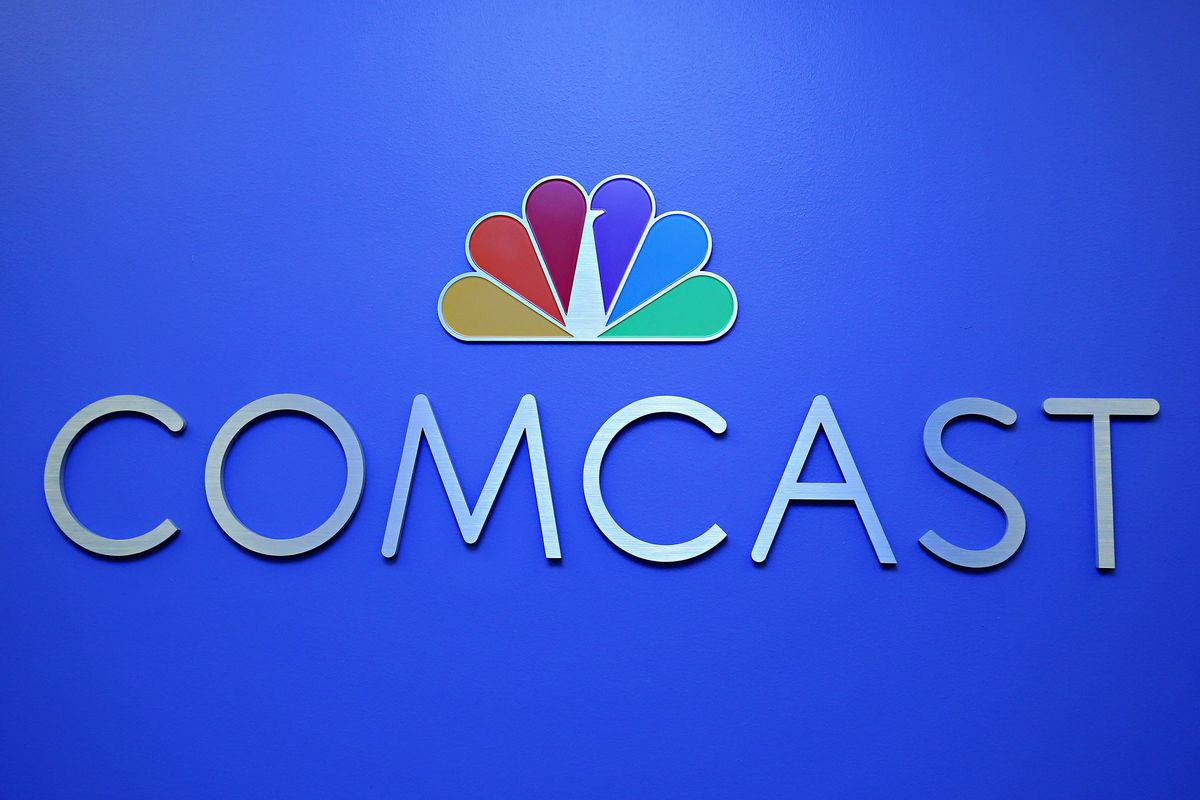

<p>In April 2014, Comcast was awarded the 2014 "Worst Company in America" award; an annual contest by the consumer affairs blog The Consumerist that runs a series of reader polls to determine the least popular company in America. This was the second time Comcast had been awarded this title, the first being in 2010.</p>

<p>On August 1, 2016, Washington State Attorney General Bob Ferguson filed a lawsuit against Comcast Corporation in King County Superior Court, alleging the company's own documents reveal a pattern of illegally deceiving their customers to pad their bottom line by tens of millions of dollars. The FCC issued a $2.3 million fine to Comcast after finding that the company was charging customers for unordered services and equipment. More than a 1000 customers issued complaints about these unprecedented charges to their bill. In addition, numerous customers reported inappropriate name-calling and interrogation by customer service representatives. Comcast's executive vice president, David Cohen, admitted the company needed to improve their customer service.</p>

<p>The existing database will serve as a repository of public customer complaints filed against Comcast.It will help to pin down what is wrong with Comcast's customer service.</p>

## Data Overview

| Field      | Description |
| ----------- | ----------- |
| Ticket # | Ticket number assigned to each complaint |
| Customer Complaint | Description of complaint |
| Date | Date of complaint |
| Time | Time of complaint |
| Received Via | Mode of communication of the complaint |
| City | Customer city |
| State | Customer state |
| Zipcode | Customer zip |
| Status | Status of complaint |
| Filing on behalf of someone | Yes/No complaint filed on behalf of someone |

## Import the required libraries and the database
Let us now import the required libraries and dataset to do analysis

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import animation
import re
import string
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import folium
%matplotlib inline

In [3]:
#import the dataset
complaints = pd.read_csv("C:/Users/ruben/OneDrive/Documents/Python_DS/Projects/Comcast_analysis/Comcast_telecom_complaints_data.csv")
complaints.head(20)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


## Exploratory Data Analysis (EDA)
Let us now perform some EDA with the help of descriptive stats and data visualization to extract hidden information from the data and to infer whats wrong with the company.

In [4]:
#Checking the structure of data
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
#checking the number of null values for each feature
complaints.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

Fortunately, there are no missing values in the dataset which is good and we can proceed with the analysis 

In [6]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
def merger(cols):
    date = cols[0]
    time = cols[1]
    x = ' '.join([date,time])
    return x

In [8]:
complaints['Timestamp'] = complaints[['Date','Time']].apply(merger,axis=1)

In [9]:
complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-04-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-08-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-04-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-07-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-05-15 1:25:26 PM


In [10]:
complaints['Timestamp'] = pd.to_datetime(complaints['Timestamp'],format = '%d-%m-%y %I:%M:%S %p')

In [11]:
complaints.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


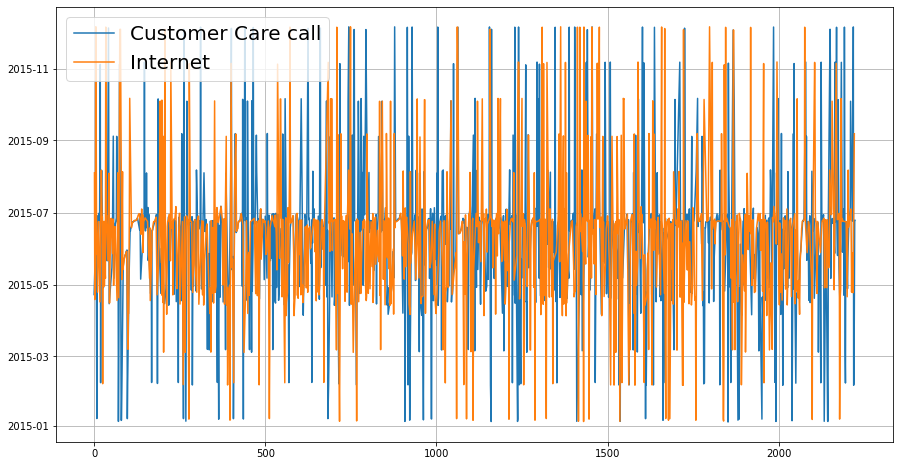

In [12]:
plt.figure(figsize=(15,8))
plt.plot(complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'], label='Customer Care call')
plt.plot(complaints[complaints['Received Via']=='Internet']['Timestamp'], label='Internet')
plt.legend(fontsize=20)
#plt.xticks(ticks = complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'], labels=list(range(9,16)))
#plt.xlim(complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'])
plt.grid(True)
plt.show()

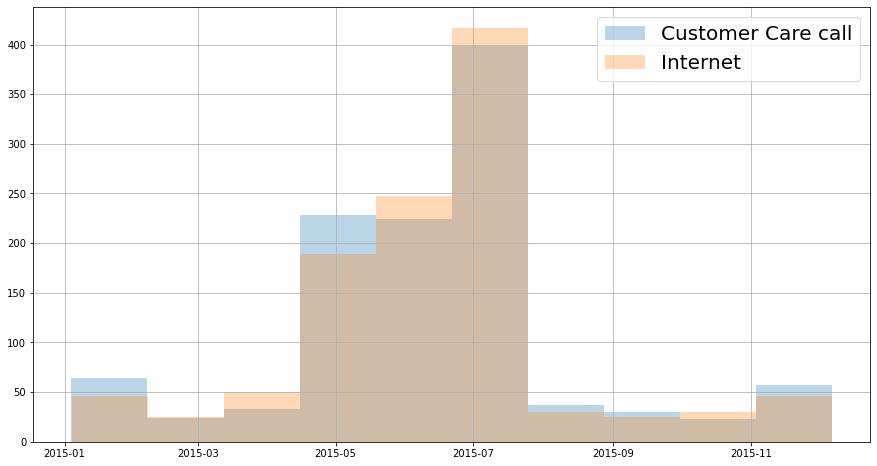

In [13]:
plt.figure(figsize=(15,8))
plt.hist(complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'], label='Customer Care call',alpha = 0.3)
plt.hist(complaints[complaints['Received Via']=='Internet']['Timestamp'], label='Internet',alpha = 0.3)
plt.legend(fontsize=20)
#plt.xticks(ticks = complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'], labels=list(range(9,16)))
#plt.xlim(complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'])
plt.grid(True)
plt.show()

In [14]:
complaints['Day']=complaints['Timestamp'].apply(lambda d:d.day)
complaints['Month'] = complaints['Timestamp'].apply(lambda d: d.month)
complaints['Year'] = complaints['Timestamp'].apply(lambda d: d.year)

In [15]:
complaints.head(30)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Day,Month,Year
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,18,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,5,7,2015
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,26,5,2015
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06 21:59:40,6,12,2015
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,24,6,2015
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23 18:56:14,23,6,2015
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06 23:46:30,6,1,2015
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28 18:46:31,28,6,2015


In [16]:
complaints['Year'].value_counts()

2015    2224
Name: Year, dtype: int64

In [17]:
complaints[complaints['Received Via']=='Customer Care Call'].groupby('Day').count()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Month,Year
Day,,,,,,,,,,,,,,
4,112,112,112,112,112,112,112,112,112,112,112,112,112,112
5,73,73,73,73,73,73,73,73,73,73,73,73,73,73
6,144,144,144,144,144,144,144,144,144,144,144,144,144,144
13,26,26,26,26,26,26,26,26,26,26,26,26,26,26
14,28,28,28,28,28,28,28,28,28,28,28,28,28,28
15,29,29,29,29,29,29,29,29,29,29,29,29,29,29
16,40,40,40,40,40,40,40,40,40,40,40,40,40,40
17,33,33,33,33,33,33,33,33,33,33,33,33,33,33
18,35,35,35,35,35,35,35,35,35,35,35,35,35,35


In [18]:
complaints[complaints['Received Via']=='Customer Care Call'].groupby('Month').count()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Day,Year
Month,,,,,,,,,,,,,,
1,32,32,32,32,32,32,32,32,32,32,32,32,32,32
2,36,36,36,36,36,36,36,36,36,36,36,36,36,36
3,20,20,20,20,20,20,20,20,20,20,20,20,20,20
4,188,188,188,188,188,188,188,188,188,188,188,188,188,188
5,156,156,156,156,156,156,156,156,156,156,156,156,156,156
6,515,515,515,515,515,515,515,515,515,515,515,515,515,515
7,25,25,25,25,25,25,25,25,25,25,25,25,25,25
8,37,37,37,37,37,37,37,37,37,37,37,37,37,37
9,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [19]:
complaints[complaints['Received Via']=='Customer Care Call'].groupby(['Month','Day']).count().describe()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Year
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703,12.296703
std,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621,14.924621
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000


In [20]:
#Determining the day with the max no. of complaints
df_counts_cust = complaints[complaints['Received Via']=='Customer Care Call'].groupby(['Month','Day']).count()
df_counts_cust[df_counts_cust['Customer Complaint']==107]

,,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Year
Month,Day,,,,,,,,,,,,,
6,24,107,107,107,107,107,107,107,107,107,107,107,107,107


In [21]:
complaints[complaints['Received Via']=='Internet'].groupby(['Month','Day']).count().describe()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Year
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778,12.277778
std,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317,15.848317
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
max,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000


In [22]:
#Determining the day with the max no. of complaints
df_counts_int = complaints[complaints['Received Via']=='Internet'].groupby(['Month','Day']).count()
df_counts_int[df_counts_int['Customer Complaint']==111]

,,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Year
Month,Day,,,,,,,,,,,,,
6,24,111,111,111,111,111,111,111,111,111,111,111,111,111


In [23]:
df_counts_int.loc[6]

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Year
Day,,,,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,7,7,7,7,7,7,7,7,7,7,7,7,7
6,5,5,5,5,5,5,5,5,5,5,5,5,5
13,22,22,22,22,22,22,22,22,22,22,22,22,22
14,6,6,6,6,6,6,6,6,6,6,6,6,6
15,17,17,17,17,17,17,17,17,17,17,17,17,17
16,11,11,11,11,11,11,11,11,11,11,11,11,11
17,17,17,17,17,17,17,17,17,17,17,17,17,17
18,20,20,20,20,20,20,20,20,20,20,20,20,20


In [24]:
#Determining the day with the min no. of complaints
df_counts_cust[df_counts_cust['Customer Complaint']==2]

,,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Year
Month,Day,,,,,,,,,,,,,
4,21,2,2,2,2,2,2,2,2,2,2,2,2,2
10,5,2,2,2,2,2,2,2,2,2,2,2,2,2


In [25]:
#Determining the day with the min no. of complaints
df_counts_int[df_counts_int['Customer Complaint']==1]

,,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Year
Month,Day,,,,,,,,,,,,,
11,4,1,1,1,1,1,1,1,1,1,1,1,1,1
12,5,1,1,1,1,1,1,1,1,1,1,1,1,1


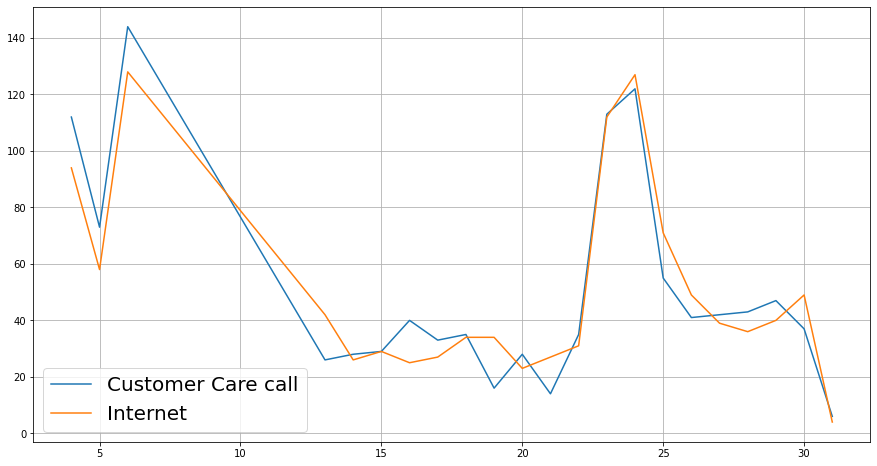

In [26]:
plt.figure(figsize=(15,8))
plt.plot(complaints[complaints['Received Via']=='Customer Care Call'].groupby('Day').count()['Month'], label='Customer Care call')
plt.plot(complaints[complaints['Received Via']=='Internet'].groupby('Day').count()['Month'], label='Internet')
plt.legend(fontsize=20)
#plt.xticks(ticks = complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'], labels=list(range(9,16)))
#plt.xlim(complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'])
plt.grid(True)
plt.show()

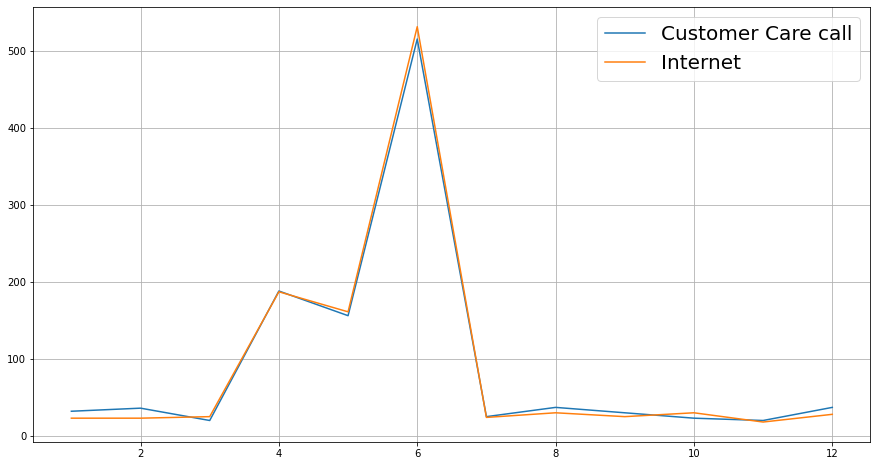

In [27]:
plt.figure(figsize=(15,8))
plt.plot(complaints[complaints['Received Via']=='Customer Care Call'].groupby('Month').count()['Day'], label='Customer Care call')
plt.plot(complaints[complaints['Received Via']=='Internet'].groupby('Month').count()['Day'], label='Internet')
plt.legend(fontsize=20)
#plt.xticks(ticks = complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'], labels=list(range(9,16)))
#plt.xlim(complaints[complaints['Received Via']=='Customer Care Call']['Timestamp'])
plt.grid(True)
plt.show()

As we can observe there is a general pattern for both internet and customer care calls complaints and notice that there isnt any discrepancies/abnormalities on that part. However it is noticed that most of the complaints peak at the 6th month of the year that is june 24th 2015

In [28]:
complaints[(complaints['Day']==24) & (complaints['Month']==6)]

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Day,Month,Year
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,24,6,2015
16,363695,Internet Availability and Speed,24-06-15,24-Jun-15,11:47:33 PM,Customer Care Call,Alexandria,Indiana,46001,Solved,No,2015-06-24 23:47:33,24,6,2015
29,360759,Wifi internet not working as well,24-06-15,24-Jun-15,2:23:23 AM,Internet,Aloha,Oregon,97006,Pending,No,2015-06-24 02:23:23,24,6,2015
116,362076,Comcast Atlanta Data Caps,24-06-15,24-Jun-15,2:13:31 PM,Internet,Atlanta,Georgia,30306,Pending,No,2015-06-24 14:13:31,24,6,2015
117,362097,Comcast Atlanta Data Caps,24-06-15,24-Jun-15,2:18:32 PM,Internet,Atlanta,Georgia,30324,Pending,No,2015-06-24 14:18:32,24,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,362830,Promised Speeds,24-06-15,24-Jun-15,4:57:13 PM,Customer Care Call,West Valley City,Utah,84119,Solved,No,2015-06-24 16:57:13,24,6,2015
2188,360866,comcast xfinity internet service.,24-06-15,24-Jun-15,6:45:42 AM,Internet,Windsor,California,95492,Solved,No,2015-06-24 06:45:42,24,6,2015
2206,360908,Issues with Comcast billing and equipment,24-06-15,24-Jun-15,8:00:17 AM,Internet,Woodstock,Georgia,30188,Solved,No,2015-06-24 08:00:17,24,6,2015
2215,360946,Comcast unfair pricing,24-06-15,24-Jun-15,8:32:24 AM,Customer Care Call,York,Pennsylvania,17403,Solved,No,2015-06-24 08:32:24,24,6,2015


Let us look into the type of complaints given by each person

In [29]:
def cleaner(x):
    x = re.sub(r'http\S+', '', x) # remove URLs(replacing the urls with nothing)
    x = re.sub(r'[%$#@&)(]', '', x) # remove special characters
    x = re.sub(r'[.,:;]', '', x)
    re_punc = re.compile('[%s]'%re.escape(string.punctuation)) #Prepare regex for char filtering
    x = [re_punc.sub('',w) for w in x.split() if w not in stopwords.words('english')] #reomove punctuations & stopwords
    x = ' '.join(x)
    return x    

In [30]:
#Let us first clean the complaint types from stopwords and punctuations
complaints['Customer Complaint'] = complaints['Customer Complaint'].apply(cleaner)

In [31]:
complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Day,Month,Year
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015
1,223441,Payment disappear service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015
2,242732,Speed Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,18,4,2015
3,277946,Comcast Imposed New Usage Cap 300GB punishes s...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,5,7,2015
4,307175,Comcast working service boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,26,5,2015


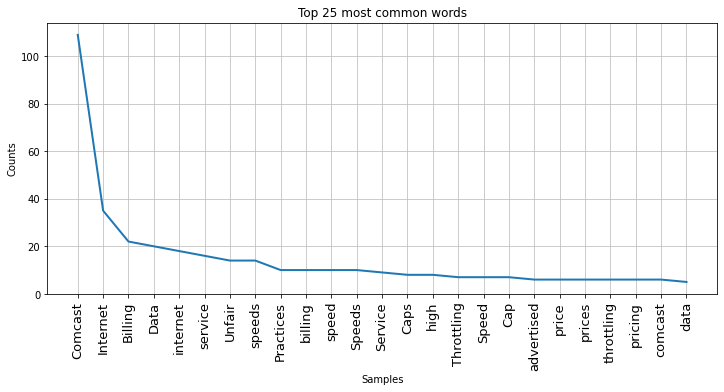

<AxesSubplot:title={'center':'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [36]:
#Checking the frequency plot
all_words = []
for line in list(complaints[(complaints['Day']==24) & (complaints['Month']==6)]['Customer Complaint']):
    words = line.split()
    for word in words:
        all_words.append(word)        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = FreqDist(all_words)
fd.plot(25,cumulative=False)   

In [37]:
text = " ".join(comp for comp in complaints['Customer Complaint'])
print ("There are {} words in the combination of all complaints.".format(len(text)))

There are 63332 words in the combination of all complaints.


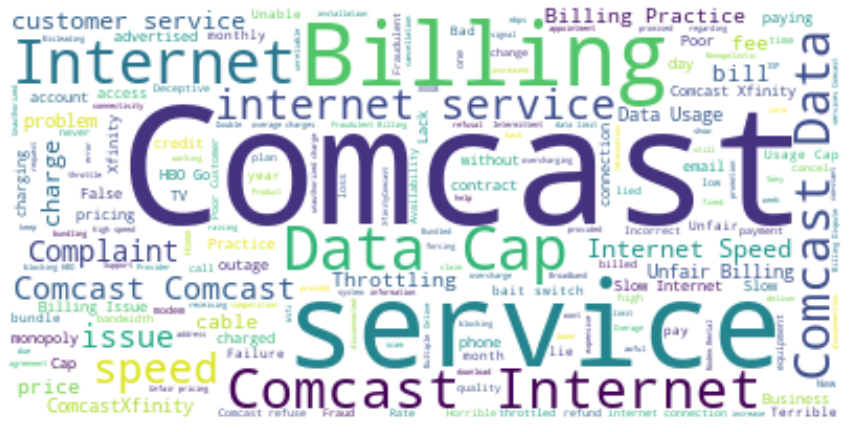

In [38]:
##Creating the word cloud
#Making a stopword list
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,8))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Here we can observe that the most important key words are Comcast, Data , service, internet and billing.So hence we can infer that the **billing, service** and **internet** are the main issues or complaints faced by a majority of people. 

In [34]:
complaints['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [35]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
def open_close(col):
    if (col == 'Open')| (col =='Pending'):
        return 'Open'
    else:
        return 'Closed'

In [36]:
complaints['New_stats'] = complaints['Status'].apply(open_close)

In [37]:
complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Timestamp,Day,Month,Year,New_stats
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015,Closed
1,223441,Payment disappear service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015,Closed
2,242732,Speed Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,18,4,2015,Closed
3,277946,Comcast Imposed New Usage Cap 300GB punishes s...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,5,7,2015,Open
4,307175,Comcast working service boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,26,5,2015,Closed


In [38]:
complaints.State.value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
New Hampshire            12
Connecticut              12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Ohio                      3
Vermont             

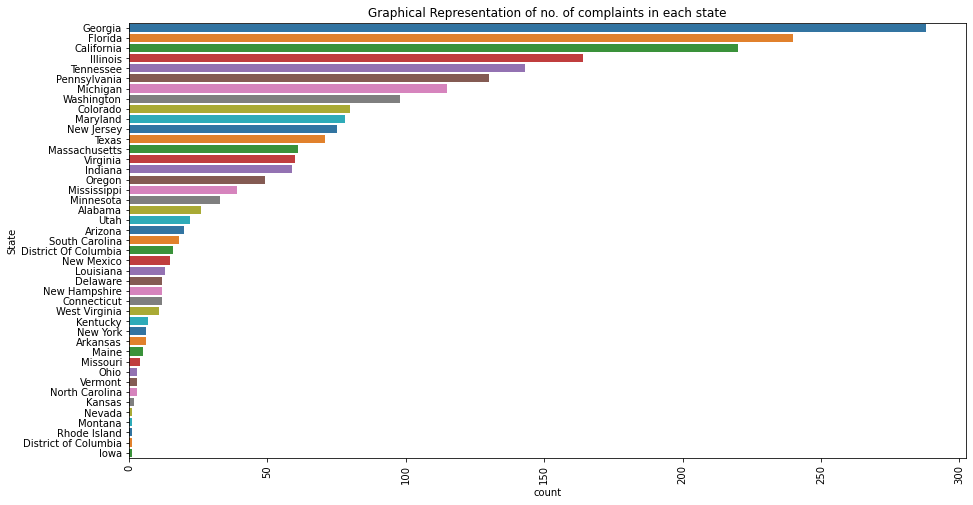

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(y ='State',data = complaints,palette = "tab10",order = complaints['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Graphical Representation of no. of complaints in each state")
plt.show()

In [40]:
complaints['State'].value_counts().index[0]

'Georgia'

We can see that **Georgia** has the maximum number of complaints with a total of 288 complaints seconded by **Florida** with 240 complaints and followed by **California** with 220 complaints.

In [41]:
#Which state has the highest percentage of unresolved complaints
complaints[complaints['New_stats']=='Open']['State'].value_counts(normalize=True)*100

Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Michigan                 4.448743
Washington               4.448743
Texas                    4.255319
Colorado                 4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Massachusetts            2.127660
Virginia                 2.127660
Indiana                  1.740812
Alabama                  1.740812
Arizona                  1.160542
Utah                     1.160542
New Hampshire            0.773694
Delaware                 0.773694
Minnesota                0.773694
New Mexico               0.773694
Connecticut              0.580271
West Virginia            0.580271
South Carolina           0.580271
Kentucky                 0.580271
Maine                    0.386847
District Of Co

In [42]:
complaints[complaints['New_stats']=='Closed']['State'].value_counts(normalize=True)*100

Georgia                 12.185120
Florida                 11.775044
California               9.314587
Illinois                 7.908612
Pennsylvania             6.444054
Tennessee                5.623902
Michigan                 5.389572
Washington               4.393673
Maryland                 3.690685
Colorado                 3.397774
New Jersey               3.280609
Massachusetts            2.929115
Indiana                  2.929115
Texas                    2.870533
Virginia                 2.870533
Oregon                   2.108963
Minnesota                1.698887
Mississippi              1.347393
Alabama                  0.995899
Utah                     0.937317
South Carolina           0.878735
District Of Columbia     0.820152
Arizona                  0.820152
Louisiana                0.702988
New Mexico               0.644405
Connecticut              0.527241
Delaware                 0.468658
West Virginia            0.468658
New Hampshire            0.468658
Arkansas      

We noticed that **Georgia** has the highest number of unresolved cases as well.Almost 13% of the cases are from Georgia.

In [43]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
complaints[complaints['New_stats']=='Closed']['Received Via'].value_counts(normalize=True)*100

Customer Care Call    50.615114
Internet              49.384886
Name: Received Via, dtype: float64

We observe the number of resolved cases through cust care calls and internet are balanced with almost a 50-50 balance.

## Conclusion
In this project report, we have
- Observed a similar pattern for both internet and customer care calls complaints. However it is noticed that most of the complaints peak at the 6th month of the year that is june 24th 2015.
- Along with reasonable statistical and visualization proof, we have determined:
    - Most complaints revolve around **billing**,**service**,and the **internet**
    - Georgia has the maximum number of complaints in which most of them are unresolved


<p>This will help in understanding why the company's revenue dropped and the correct prescriptive actions take place.</p>